##### MultilinearRegression

###### Perform predictive modeling on mtcars.csv dataset from which select few columns as an input and  output as mpg(mileage per gallon)
###### So on the basis of inputs selected we have to predict its mileage

##### This is a multilinear regression problem as it has multiple inputs and single output 

##### Import required pachages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### Read data and create Data Frame for it

In [2]:
df = pd.read_csv('mtcars.csv')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


##### check size od data 

In [3]:
df.shape

(32, 11)

##### Describe Data to check missing values
As all columns of data frame havinf 32 non-null entries there are no any missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


##### Get the count of NaN values from data Frame

In [5]:
df.isna().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [6]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

##### Here mileage per gallon (mpg) is output
##### To select input features we go for scatter plot

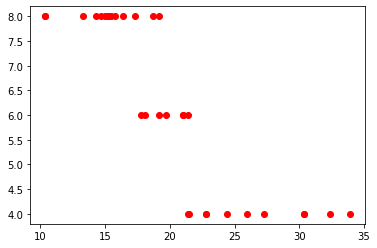

In [7]:
plt.scatter(df.mpg,df.cyl,color = 'r')     # Non linear relationship
plt.show()

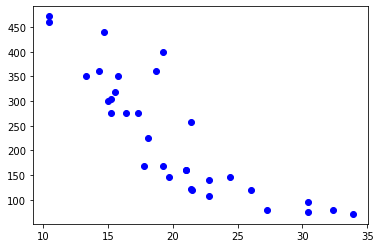

In [8]:
plt.scatter(df.mpg,df.disp,color = 'b')    # Linear rerlationship
plt.show()

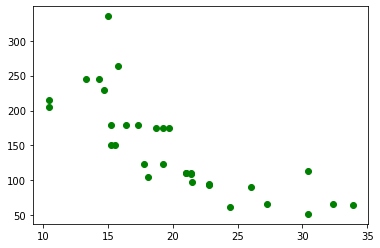

In [9]:
plt.scatter(df.mpg,df.hp,color = 'g')      # Linear relationship
plt.show()

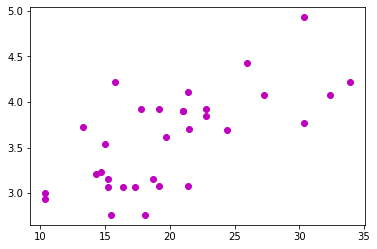

In [10]:
plt.scatter(df.mpg,df.drat,color = 'm')    # linear relationship
plt.show()

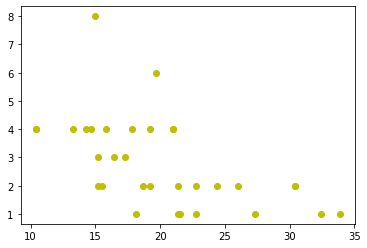

In [11]:
plt.scatter(df.mpg,df.carb,color = 'y')    # Non linear relationship
plt.show()

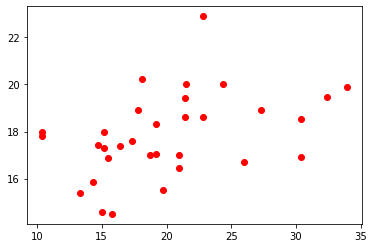

In [12]:
plt.scatter(df.mpg,df.qsec,color = 'r')    # Non linear relationship
plt.show()

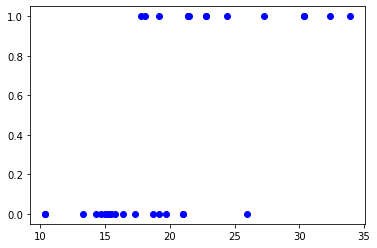

In [13]:
plt.scatter(df.mpg,df.vs,color = 'b')      # Non linear relationship
plt.show()

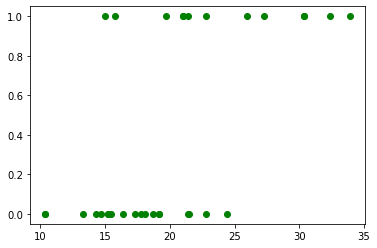

In [14]:
plt.scatter(df.mpg,df.am,color = 'g')      # Non linear relationship
plt.show()

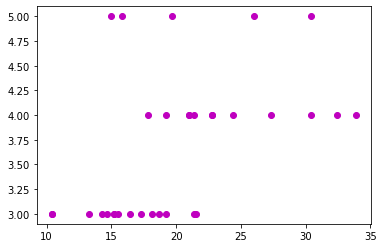

In [15]:
plt.scatter(df.mpg,df.gear,color = 'm')    # Non Linear relationship
plt.show()

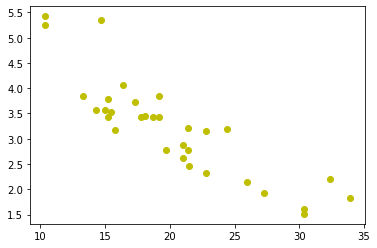

In [16]:
plt.scatter(df.mpg,df.wt,color = 'y')      # Linear relationship
plt.show()

##### Like scatter plot we can also use lmplot, regression plot, heat map

##### Columns disp,hp,wt are linear, Select them as input and mpg be the output

In [17]:
X = df[['disp','hp','wt']]
X[:3]

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320


In [18]:
y = df.mpg
y[:3]

0    21.0
1    21.0
2    22.8
Name: mpg, dtype: float64

##### Check for the outlayers in selected columns

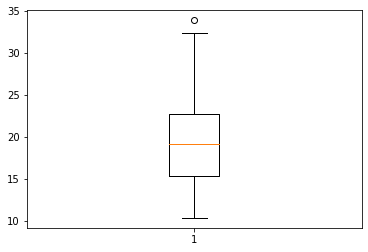

In [19]:
plt.boxplot(y)
plt.show()

In [20]:
df['mpg'] = df[y<33]['mpg']

In [21]:
df.dropna(inplace = True)

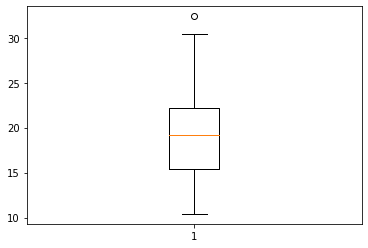

In [22]:
plt.boxplot(df.mpg)
plt.show()

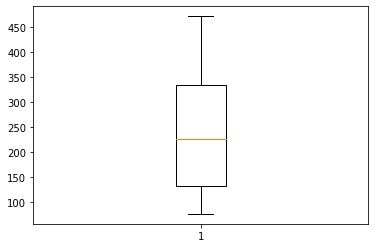

In [23]:
plt.boxplot(df.disp)
plt.show()

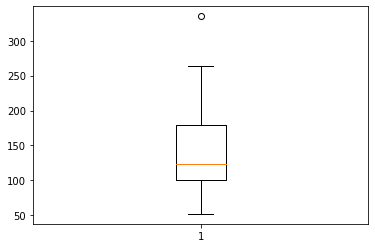

In [24]:
plt.boxplot(df.hp)
plt.show()

In [25]:
df.hp = df[df.hp<300].hp

In [26]:
df.dropna(inplace = True)

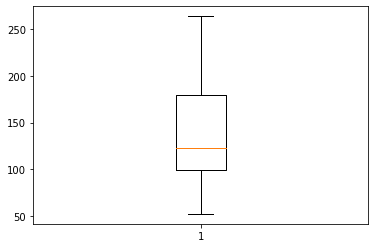

In [27]:
plt.boxplot(df.hp)
plt.show()

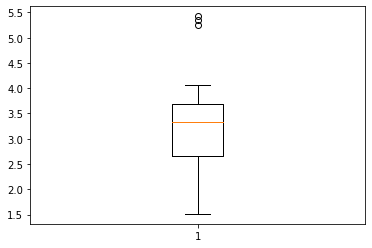

In [28]:
plt.boxplot(df.wt)
plt.show()

In [29]:
df.wt = df[df.wt<4.2].wt

In [30]:
df.dropna(inplace = True)

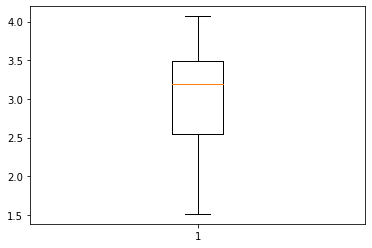

In [31]:
plt.boxplot(df.wt)
plt.show()

In [32]:
X = df[['disp','hp','wt']]
X

,disp,hp,wt
0,160.0,110.0,2.620
1,160.0,110.0,2.875
2,108.0,93.0,2.320
3,258.0,110.0,3.215
4,360.0,175.0,3.440
5,225.0,105.0,3.460
6,360.0,245.0,3.570
7,146.7,62.0,3.190
8,140.8,95.0,3.150
9,167.6,123.0,3.440


In [33]:
y = df.mpg
y

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
17    32.4
18    30.4
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
31    21.4
Name: mpg, dtype: float64

In [34]:
model = LinearRegression()

In [35]:
model

LinearRegression()

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,shuffle = False)

In [54]:
X.shape

(27, 3)

In [55]:
y.shape

(27,)

In [56]:
X_train.shape

(21, 3)

In [57]:
X_test.shape

(6, 3)

In [58]:
y_train.shape

(21,)

In [59]:
y_test.shape

(6,)

In [60]:
X_train[:3]

,disp,hp,wt
0,160.0,110.0,2.620
1,160.0,110.0,2.875
2,108.0,93.0,2.320


In [61]:
y_train[:3]

0    21.0
1    21.0
2    22.8
Name: mpg, dtype: float64

##### Training / fitting of model

In [62]:
model.fit(X_train,y_train)

LinearRegression()

In [63]:
model.coef_

array([ 0.00425278, -0.04627533, -4.01237155])

In [64]:
model.intercept_

38.013344694365685

##### Prediction / Testing of model

In [65]:
model.predict(X_test)

array([27.53120392, 25.72742446, 27.11795412, 14.57016693, 19.41754661,
       22.32952773])

##### Accuracy / Score checking

In [66]:
model.score(X_test,y_test) * 100

90.877969503706

In [67]:
model.score(X_train,y_train) * 100

79.35733926926291

In [68]:
model.score(X,y) * 100

83.58775074896072

<AxesSubplot:xlabel='wt', ylabel='mpg'>

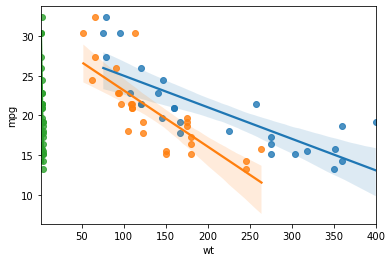

In [80]:
sns.regplot(x = 'disp',y = 'mpg',data = df)
sns.regplot(x = 'hp',y = 'mpg',data = df)
sns.regplot(x = 'wt',y = 'mpg',data = df)

##### Use heat map to check correlation of columns

In [81]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.842765,-0.799687,-0.786945,0.619219,-0.868308,0.387134,0.604139,0.609410,0.531501,-0.465334
cyl,-0.842765,1.000000,0.926194,0.844293,-0.657541,0.810085,-0.576481,-0.775128,-0.525487,-0.545112,0.434947
disp,-0.799687,0.926194,1.000000,0.832842,-0.663349,0.804870,-0.480840,-0.680334,-0.596644,-0.585514,0.237757
hp,-0.786945,0.844293,0.832842,1.000000,-0.408495,0.647321,-0.697852,-0.714615,-0.316740,-0.250382,0.574488
drat,0.619219,-0.657541,-0.663349,-0.408495,1.000000,-0.708714,0.043538,0.357790,0.700331,0.722052,0.065650
wt,-0.868308,0.810085,0.804870,0.647321,-0.708714,1.000000,-0.135265,-0.482949,-0.788723,-0.646149,0.318056
qsec,0.387134,-0.576481,-0.480840,-0.697852,0.043538,-0.135265,1.000000,0.756835,-0.246974,-0.157242,-0.610275
vs,0.604139,-0.775128,-0.680334,-0.714615,0.357790,-0.482949,0.756835,1.000000,0.106160,0.193201,-0.531484
am,0.609410,-0.525487,-0.596644,-0.316740,0.700331,-0.788723,-0.246974,0.106160,1.000000,0.770151,0.052093
gear,0.531501,-0.545112,-0.585514,-0.250382,0.722052,-0.646149,-0.157242,0.193201,0.770151,1.000000,0.261187


<AxesSubplot:>

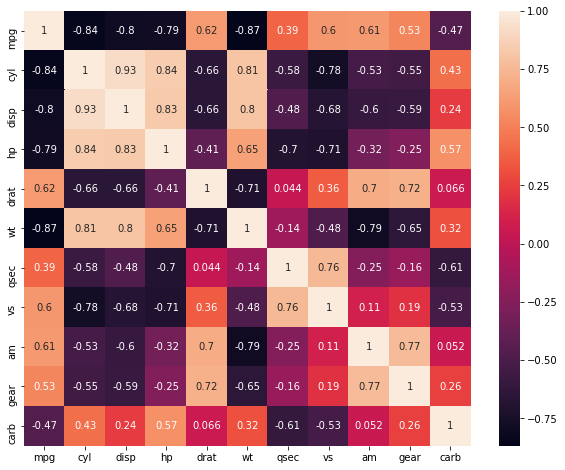

In [82]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True)

In [87]:
X = df[['drat','vs','am']]

In [88]:
y = df.mpg

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8)

In [105]:
model.fit(X_train,y_train)

LinearRegression()

In [106]:
model.predict(X_test)

array([15.42872979, 15.42872979, 15.48101735, 21.10056827, 27.02049423,
       15.86010215])

In [107]:
model.score(X_train,y_train) * 100

60.77031426417684

In [108]:
model.score(X_test,y_test) * 100

81.3129139256639

In [109]:
model.score(X,y) * 100

66.59396222582214

##### From above analysis we conclude that features selected by linear data distribution gives better accuracy